In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["flower"] = iris.target
df["flower"] = df["flower"].apply(lambda x: iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3)

In [12]:
model = svm.SVC(kernel="rbf", C=30, gamma="auto")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9555555555555556

In [14]:
from sklearn.model_selection import cross_val_score


In [18]:
cross_val_score(svm.SVC(kernel="linear", C=10, gamma="auto"), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [19]:
cross_val_score(svm.SVC(kernel="rbf", C=30, gamma="auto"), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.93333333, 1.        ])

In [20]:
cross_val_score(svm.SVC(kernel="rbf", C=20, gamma="auto"), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

#   introducing GridSearch

In [ ]:
#   once again one manual solution!

In [21]:
kernels = ["rbf", "linear"]
C = [1,10,20]
gamma = [1,0.1,0.01]
avg_scores = {}

for kval in kernels:
    for cval in C:
        for g in gamma:
            gamma_scores = cross_val_score(svm.SVC(kernel=kval, C=cval, gamma=g), iris.data, iris.target, cv=5)
            avg_scores[kval + "_" + str(cval) + "_" + str(g)] = np.average(gamma_scores)

avg_scores

{'rbf_1_1': 0.9666666666666668,
 'rbf_1_0.1': 0.9800000000000001,
 'rbf_1_0.01': 0.9333333333333333,
 'rbf_10_1': 0.9533333333333334,
 'rbf_10_0.1': 0.9800000000000001,
 'rbf_10_0.01': 0.9800000000000001,
 'rbf_20_1': 0.9533333333333334,
 'rbf_20_0.1': 0.9733333333333334,
 'rbf_20_0.01': 0.9800000000000001,
 'linear_1_1': 0.9800000000000001,
 'linear_1_0.1': 0.9800000000000001,
 'linear_1_0.01': 0.9800000000000001,
 'linear_10_1': 0.9733333333333334,
 'linear_10_0.1': 0.9733333333333334,
 'linear_10_0.01': 0.9733333333333334,
 'linear_20_1': 0.9666666666666666,
 'linear_20_0.1': 0.9666666666666666,
 'linear_20_0.01': 0.9666666666666666}

In [22]:
#   now introducing GridSearch!

In [24]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(), {
    "C": C,
    "kernel": kernels,
    "gamma": gamma
}, cv=5, return_train_score=False)

clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00126848, 0.00079908, 0.0010026 , 0.00059986, 0.00100899,
        0.00040665, 0.00070205, 0.00060539, 0.00101538, 0.00039992,
        0.00059724, 0.00085526, 0.00082426, 0.00095072, 0.000806  ,
        0.00111628, 0.00070891, 0.00081148]),
 'std_fit_time': array([2.34353923e-04, 3.99560250e-04, 3.40663359e-06, 4.89835877e-04,
        1.51090427e-05, 4.98150335e-04, 6.02480411e-04, 4.94403139e-04,
        6.61296699e-04, 4.89804186e-04, 4.87667169e-04, 4.39478472e-04,
        3.44816389e-04, 5.50540427e-04, 4.03253113e-04, 2.09522974e-04,
        6.09851975e-04, 4.06936155e-04]),
 'mean_score_time': array([0.0006021 , 0.00080276, 0.00090261, 0.0006052 , 0.0004005 ,
        0.00070672, 0.00091467, 0.00039706, 0.0001915 , 0.00067739,
        0.00099893, 0.00040202, 0.00038033, 0.00019698, 0.00039968,
        0.0003952 , 0.00040431, 0.00038438]),
 'std_score_time': array([4.91624651e-04, 4.01382192e-04, 4.92212680e-04, 4.94220646e-04,
        4.90601260e-04, 6.06

In [25]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001268,0.000234,0.000602,0.000492,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.966667,1.000000,0.900000,0.966667,1.0,0.966667,0.036515,12
1,0.000799,0.000400,0.000803,0.000401,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001003,0.000003,0.000903,0.000492,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000600,0.000490,0.000605,0.000494,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.001009,0.000015,0.000400,0.000491,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.900000,0.966667,0.866667,0.933333,1.0,0.933333,0.047140,18
5,0.000407,0.000498,0.000707,0.000607,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
6,0.000702,0.000602,0.000915,0.000506,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.966667,0.966667,0.900000,0.933333,1.0,0.953333,0.033993,16
7,0.000605,0.000494,0.000397,0.000486,10,1,linear,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,8
8,0.001015,0.000661,0.000191,0.000383,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
9,0.000400,0.000490,0.000677,0.000568,10,0.1,linear,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,8


In [28]:
df[["param_kernel", "param_C", "param_gamma", "mean_test_score"]]

,param_kernel,param_C,param_gamma,mean_test_score
0,rbf,1,1,0.966667
1,linear,1,1,0.980000
2,rbf,1,0.1,0.980000
3,linear,1,0.1,0.980000
4,rbf,1,0.01,0.933333
5,linear,1,0.01,0.980000
6,rbf,10,1,0.953333
7,linear,10,1,0.973333
8,rbf,10,0.1,0.980000
9,linear,10,0.1,0.973333


In [29]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [30]:
clf.best_score_

0.9800000000000001

In [31]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

#   Randomized Search

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
rs = RandomizedSearchCV(svm.SVC(),{
    "C": C,
    "kernel": kernels,
    "gamma": gamma
}, cv=5, 
return_train_score=False,
n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[["param_kernel", "param_C", "param_gamma", "mean_test_score"]]

,param_kernel,param_C,param_gamma,mean_test_score
0,linear,1,1,0.98
1,linear,1,0.1,0.98


In [37]:
#   randomly tries the parameters (according to chosen iter)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [39]:
model_params = {
    "svm": {
        "model": svm.SVC(),
        "params": {
            "C": C,
            "kernel": kernels,
            "gamma": gamma
        }
    },
    "random_forrest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [1,5,10]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(solver="liblinear", multi_class="auto"),
        "params": {
            "C": [1,5,10]
        }
    }
}

In [40]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })


In [42]:
df = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}"
1,random_forrest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


In [48]:
#   now testing a lot of model simultaneuosly on digits dataset

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

digits = datasets.load_digits()
digits.data.shape
digits.target.shape

(1797,)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [57]:
X_train.shape
y_test.shape

(360,)

In [58]:
model_params = {
    "svm": {
        "model": svm.SVC(),
        "params": {
            "C": C,
            "kernel": kernels,
            "gamma": gamma
        }
    },
    "random_forrest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [1,5,10]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(solver="liblinear", multi_class="auto"),
        "params": {
            "C": [1,5,10]
        }
    },
    "gausian_nb": {
        "model": GaussianNB(),
        "params": {
        }
    },
    "multimonial_nb": {
        "model": MultinomialNB(),
        "params": {
        }
    },
    "decision_tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [10,50,100]
        }
    }
}

In [61]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })

In [62]:
df = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df

,model,best_score,best_params
0,svm,0.976333,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}"
1,random_forrest,0.933208,{'n_estimators': 10}
2,logistic_regression,0.947113,{'C': 1}
3,gausian_nb,0.839958,{}
4,multimonial_nb,0.895603,{}
5,decision_tree,0.844113,{'max_depth': 100}


0.9777777777777777


<Axes: >

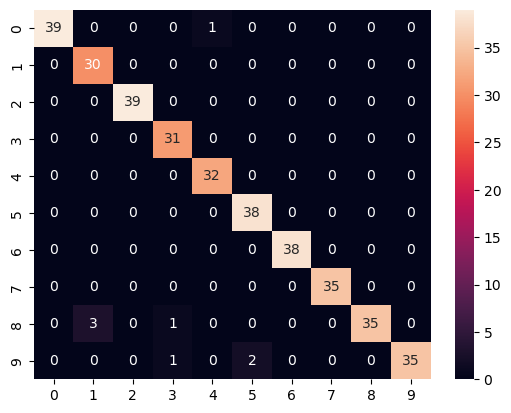

In [78]:
best = svm.SVC(C=1, gamma=1, kernel="linear")
best.fit(X_train,y_train)
predictions = best.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(best.score(X_test, y_test))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [67]:
#   trying out the scaler

<Axes: >

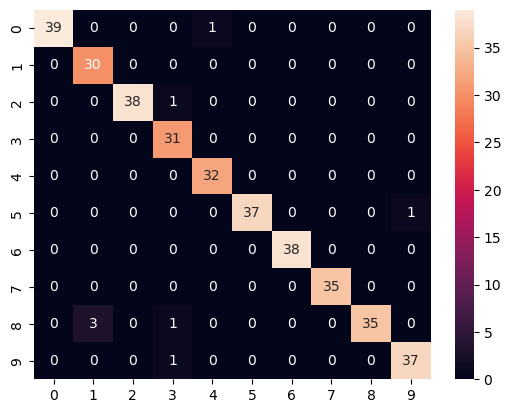

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform((X_train))
scaled_X_test = scaler.fit_transform((X_test))
best.fit(scaled_X_train, y_train)
predictions = best.predict(scaled_X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [76]:
print("Score without scaling: ",best.score(X_test, y_test))
print("Score after scaling: ",best.score(scaled_X_test, y_test))


Score without scaling:  0.8555555555555555
Score after scaling:  0.9777777777777777


In [ ]:
#   For further analysis would be possible:
#   1. implement more hyperparameters 
#   2. introduce more models
#   3. various models test not only on training data, but also on test data.
#   4. introducing MSE, MAE R2 for quality of models

In [52]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

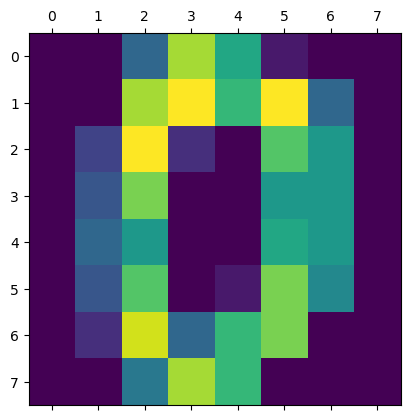

In [53]:
import matplotlib.pyplot as plt
plt.matshow(digits.data[0].reshape(8,8))